# Loading Libraries , packages and modules for project

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#from sklearn.preprocessing.imputation import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


# Loading Data file (datamart_train)

In [20]:
df_train = pd.read_csv('train_datamart.csv')
df_test = pd.read_csv('test_datamart.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
df_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# Data exploration

In [22]:
print ('train data size', df_train.shape)
print ('test data size', df_test.shape)

train data size (8523, 12)
test data size (5681, 11)


In [23]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [24]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [25]:
df_train.index

RangeIndex(start=0, stop=8523, step=1)

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [27]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis (EDA)

## Data Distributions 

In [28]:
df_train.dtypes=='object'

Item_Identifier               True
Item_Weight                  False
Item_Fat_Content              True
Item_Visibility              False
Item_Type                     True
Item_MRP                     False
Outlet_Identifier             True
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type          True
Outlet_Type                   True
Item_Outlet_Sales            False
dtype: bool

In [29]:
#Categorical columns 
cat_col = ['Item_Identifier', 'Item_Fat_Content','Item_Type', 'Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type','Outlet_Type']

In [30]:
#Continous columns 
continous_col = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year', 'Item_Outlet_Sales']

In [31]:
for i in cat_col:
    print ('*********train data_', i, '*************')
    print (df_train[i].unique())
    print ('*********test data_', i, '*************')
    print (df_test[i].unique())
    print ('\n\n')
    

*********train data_ Item_Identifier *************
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
*********test data_ Item_Identifier *************
['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']



*********train data_ Item_Fat_Content *************
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
*********test data_ Item_Fat_Content *************
['Low Fat' 'reg' 'Regular' 'LF' 'low fat']



*********train data_ Item_Type *************
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
*********test data_ Item_Type *************
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']



*********train data_ Outlet_Identifier *************
['OUT049' 'OUT018' 'OUT0

In [32]:
for i in cat_col:
    print ('*********train data_', i, 'value counts*************')
    print (df_train[i].value_counts())
    print ('*********test data_', i, ' value counts*************')
    print (df_test[i].value_counts())
    print ('\n\n')
    

*********train data_ Item_Identifier value counts*************
FDW13    10
FDG33    10
FDF56     9
NCI54     9
NCL31     9
         ..
FDY43     1
FDE52     1
DRF48     1
FDC23     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64
*********test data_ Item_Identifier  value counts*************
FDQ60    8
DRF48    8
FDK57    8
FDW10    8
FDZ50    8
        ..
FDU12    1
FDR44    1
DRK12    1
FDR43    1
FDU34    1
Name: Item_Identifier, Length: 1543, dtype: int64



*********train data_ Item_Fat_Content value counts*************
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
*********test data_ Item_Fat_Content  value counts*************
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64



*********train data_ Item_Type value counts*************
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen

*********train data_ Item_Identifier *************


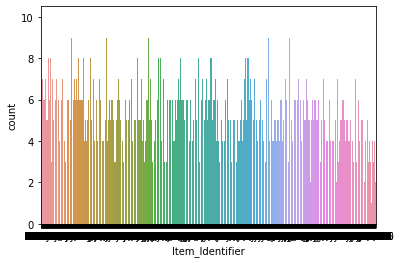

*********test data_ Item_Identifier  *************


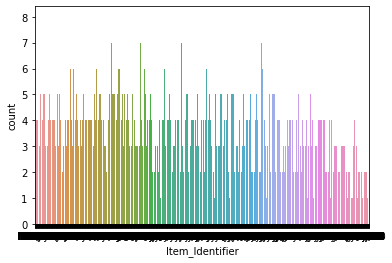




*********train data_ Item_Fat_Content *************


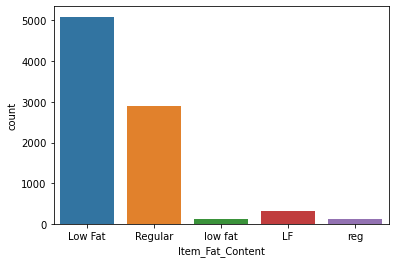

*********test data_ Item_Fat_Content  *************


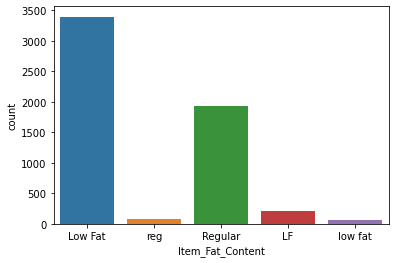




*********train data_ Item_Type *************


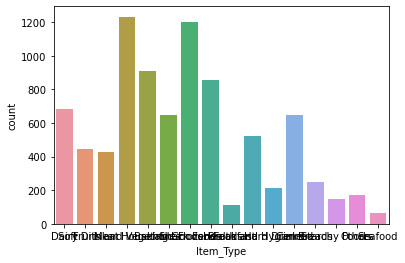

*********test data_ Item_Type  *************


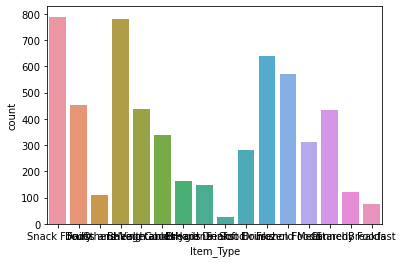




*********train data_ Outlet_Identifier *************


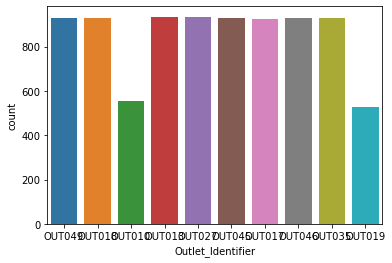

*********test data_ Outlet_Identifier  *************


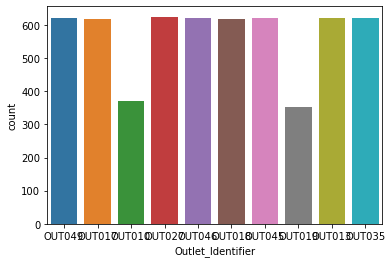




*********train data_ Outlet_Size *************


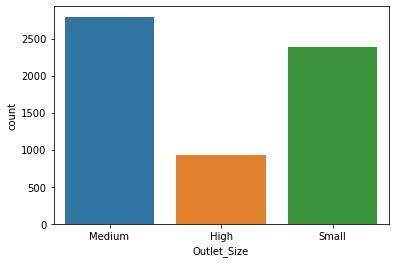

*********test data_ Outlet_Size  *************


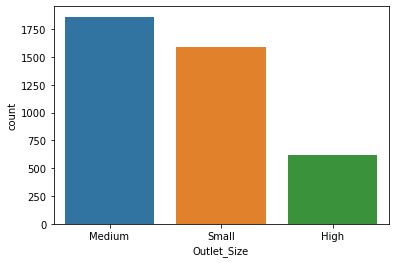




*********train data_ Outlet_Location_Type *************


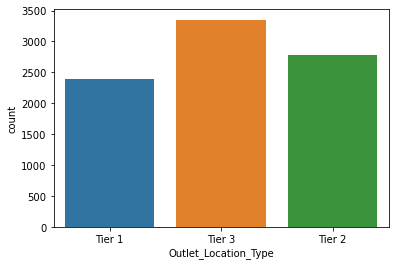

*********test data_ Outlet_Location_Type  *************


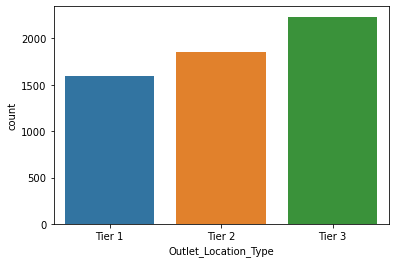




*********train data_ Outlet_Type *************


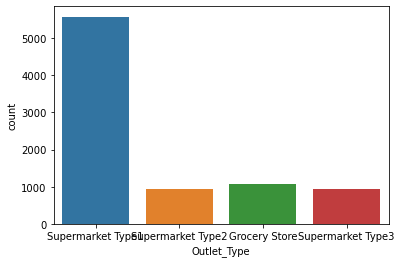

*********test data_ Outlet_Type  *************


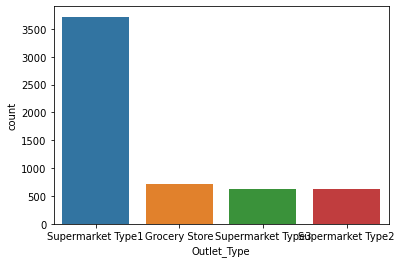

In [33]:
# distribution map
for i in cat_col:
    print ('*********train data_', i, '*************')
    sns.countplot(df_train[i])
    plt.show()
    print ('*********test data_', i, ' *************')
    sns.countplot(df_test[i])
    plt.show()
    print ('\n\n')
    

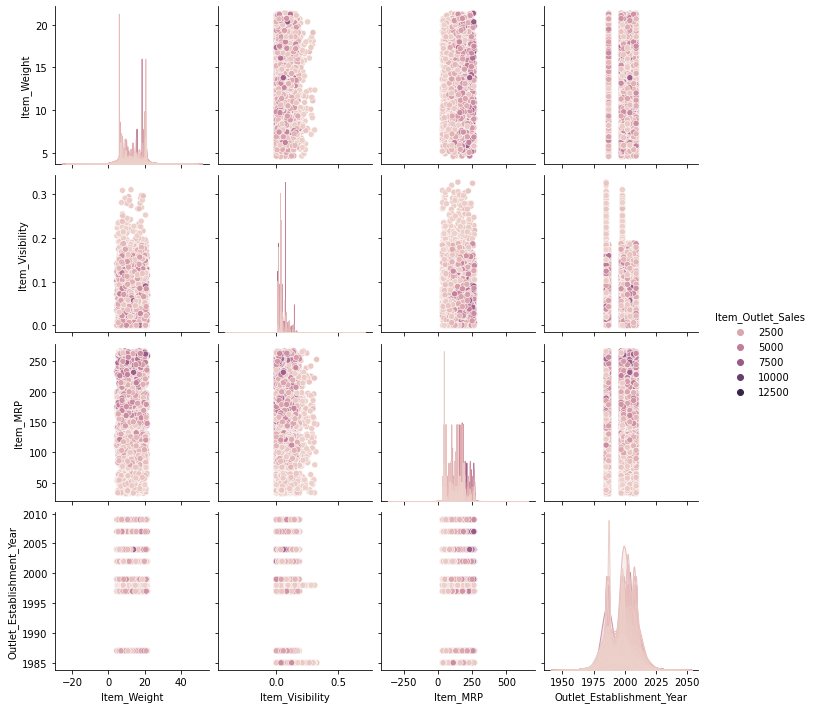

In [34]:
sns.pairplot(data = df_train, hue='Item_Outlet_Sales')


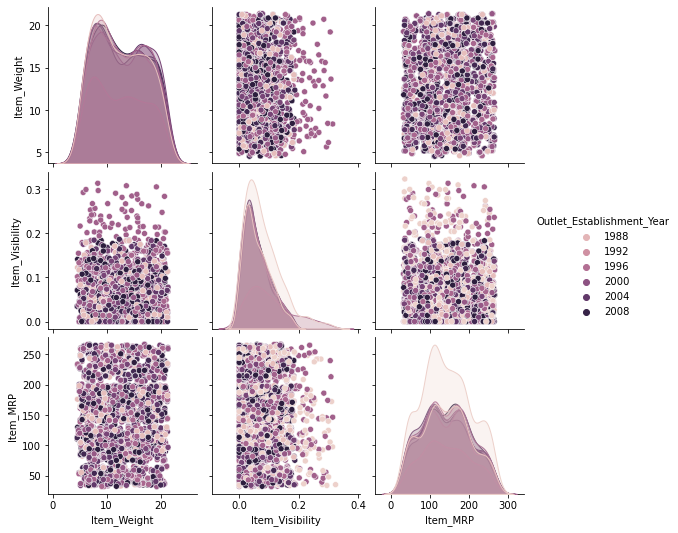

In [35]:
sns.pairplot(data = df_test, hue='Outlet_Establishment_Year')

# Continous columns distribution

In [36]:
continous_col = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']

*********train data_ Item_Weight *************


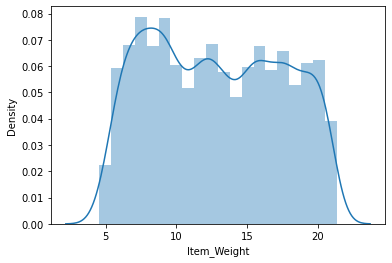

*********test data_ Item_Weight  *************


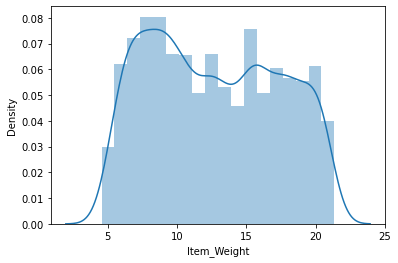




*********train data_ Item_Visibility *************


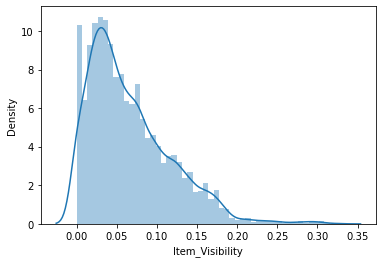

*********test data_ Item_Visibility  *************


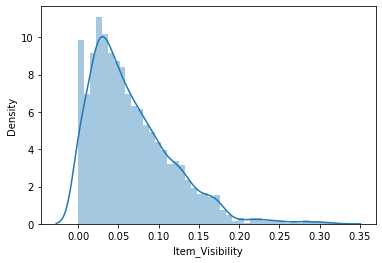




*********train data_ Item_MRP *************


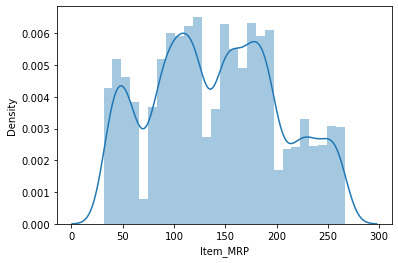

*********test data_ Item_MRP  *************


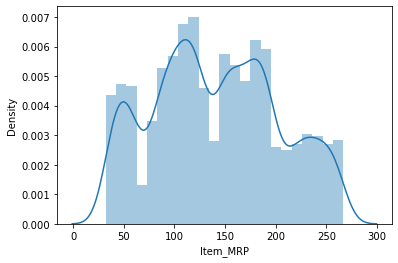




*********train data_ Outlet_Establishment_Year *************


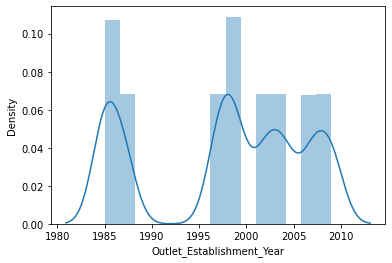

*********test data_ Outlet_Establishment_Year  *************


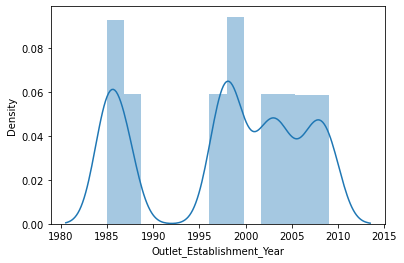

In [37]:
# distribution map
for i in continous_col:
    print ('*********train data_', i, '*************')
    sns.distplot(df_train[i])
    plt.show()
    print ('*********test data_', i, ' *************')
    sns.distplot(df_test[i])
    plt.show()
    print ('\n\n')
    


# Missing Values

In [38]:
df_train.isnull().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [39]:
df_test.isnull().sum() 

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## Manipulation of missing values


In [40]:
print ('mean value Item_Weight', round(df_train['Item_Weight'].mean(), 2))
print ('median value of Item_Weight', round(df_train['Item_Weight'].median(), 2))
print ('mean value Item_Weight', round(df_test['Item_Weight'].mean(), 2))
print ('median value of Item_Weight', round(df_test['Item_Weight'].median(), 2))

#Data patterns suggesting data has normally distributed. 

mean value Item_Weight 12.86
median value of Item_Weight 12.6
mean value Item_Weight 12.7
median value of Item_Weight 12.5


In [41]:
print ('Pct of missing values in train_Item_Weight',round(df_train['Item_Weight'].isnull().sum()/len(df_train)*100, 2), '%')
print ('Pct of missing values in test_Item_Weight',round(df_test['Item_Weight'].isnull().sum()/len(df_train)*100, 2), '%')
print ('Pct of missing values in train_Outlet_Size',round(df_train['Outlet_Size'].isnull().sum()/len(df_train)*100, 2), '%')
print ('Pct of missing values in test_Outlet_Size',round(df_test['Outlet_Size'].isnull().sum()/len(df_train)*100, 2), '%')

Pct of missing values in train_Item_Weight 17.17 %
Pct of missing values in test_Item_Weight 11.45 %
Pct of missing values in train_Outlet_Size 28.28 %
Pct of missing values in test_Outlet_Size 18.84 %


In [42]:
df_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [43]:
df_test['Outlet_Size'].mode()

0    Medium
dtype: object

In [44]:
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(round(df_train['Item_Weight'].mean(), 2))
df_test['Item_Weight'] =  df_test['Item_Weight'].fillna(round(df_test['Item_Weight'].mean(), 2))
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna('Medium')
df_test['Outlet_Size'] =  df_test['Outlet_Size'].fillna('Medium')

In [45]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [46]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Outliers Identification and Treatment

In [47]:
def outlier_iqr(input_data):
    q1=input_data.quantile(0.25)
    q3=input_data.quantile(0.75)
    iqr = q3-q1
    lower_whisker = q1-(1.5*iqr)
    upper_whisker = q3+(1.5*iqr)
    outlier_list = []
    for i in input_data:
        if i>upper_whisker or i<lower_whisker:
            outlier_list.append(i)
    print ('outliers are', outlier_list)
    print ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)
    return ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)

In [48]:
#Quantifying Outliers
continous_col = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
for i in continous_col:
    print('*****outliers in train data',i)
    outlier_iqr(df_train[i])
    print('*****outliers in test data',i)
    outlier_iqr(df_test[i])

*****outliers in train data Item_Weight
outliers are []
lower_whisker value : -0.7249999999999996 upper_whisker value 26.035
*****outliers in test data Item_Weight
outliers are []
lower_whisker value : -0.7874999999999979 upper_whisker value 25.832499999999996
*****outliers in train data Item_Visibility
outliers are [0.255394896, 0.293417759, 0.278974075, 0.291865402, 0.2047, 0.264124669, 0.228993134, 0.297883712, 0.233039817, 0.210375806, 0.220225608, 0.328390948, 0.205294827, 0.247321039, 0.214139786, 0.227189581, 0.223440258, 0.267352587, 0.25637539, 0.244102315, 0.255348289, 0.224837308, 0.22417463, 0.245542627, 0.236433601, 0.270300331, 0.204713036, 0.32111501, 0.248301532, 0.274405193, 0.207783483, 0.196438668, 0.235354055, 0.241055611, 0.196490902, 0.30374337, 0.23212188, 0.216323008, 0.198424841, 0.213125482, 0.237651344, 0.222063351, 0.294939214, 0.284065879, 0.234733477, 0.309390255, 0.277459381, 0.21332355, 0.253947823, 0.203510667, 0.236616754, 0.205605116, 0.212963193, 0.2

In [49]:
#Infereance: 
#There are several outliers in item visibility imputations are done in specified columns 
#All outliers are crossed upperwhisker 

In [50]:
#Outlier Treatment

In [51]:
df_train['Item_Visibility']=df_train['Item_Visibility'].mask(df_train['Item_Visibility']>0.195,df_train['Item_Visibility'].mean()) 
df_test['Item_Visibility']=df_test['Item_Visibility'].mask(df_test['Item_Visibility']>0.193,df_test['Item_Visibility'].mean())

# Data Preparation

## Encoding the lables

In [52]:
#One Hot encoding through dummies method in Pandas
X_train=df_train.copy()
X_train1=df_train.copy()
X_train1.drop('Item_Identifier', axis=1)
X_train.drop(['Item_Outlet_Sales','Item_Identifier'], axis=1, inplace =True)


In [53]:
x_train=pd.get_dummies(X_train)
x_train1=pd.get_dummies(X_train1)
x_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [54]:
X_test=df_test.copy()
X_test.drop('Item_Identifier', axis=1, inplace=True)
x_test=pd.get_dummies(X_test)
x_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300,0.038428,87.3198,2007,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600,0.099575,241.7538,1998,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315,0.015388,155.0340,2007,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.700,0.118599,234.2300,1985,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [55]:
y_train = df_train['Item_Outlet_Sales']
y_train

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Feature Engineering

In [56]:
corr = x_train1.corr()['Item_Outlet_Sales']
corr

Item_Weight                      0.011567
Item_Visibility                 -0.073185
Item_MRP                         0.567574
Outlet_Establishment_Year       -0.049135
Item_Outlet_Sales                1.000000
                                   ...   
Outlet_Location_Type_Tier 3      0.046376
Outlet_Type_Grocery Store       -0.411727
Outlet_Type_Supermarket Type1    0.108765
Outlet_Type_Supermarket Type2   -0.038059
Outlet_Type_Supermarket Type3    0.311192
Name: Item_Outlet_Sales, Length: 1605, dtype: float64

### Converting data in to array format

In [57]:
x_train=np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)

# Regression Models

## Multi Linear Regression (MLR)

In [58]:
from sklearn.linear_model import LinearRegression
mlr_model=LinearRegression(fit_intercept=True)
mlr_model.fit(x_train, y_train)
mlr_pred = mlr_model.predict(x_test)
print ('Model predicted for given test set')
print ('Model predicted values', mlr_pred)


Model predicted for given test set
Model predicted values [1838.62599672 1431.14585121 1877.31361575 ... 1824.6864765  3592.42275148
 1287.74866237]


In [59]:
# Here we couldn't make validation , since target column in missing in given test data
#Hence, we can't print the model r2-score value

## Decision Tree Regression

In [60]:
from sklearn.tree import DecisionTreeRegressor
DT_model=DecisionTreeRegressor(criterion='mse', splitter='best', random_state=None)
DT_model.fit(x_train, y_train)
DT_pred = DT_model.predict(x_test)
print (DT_pred)


[1230.3984 2067.309   759.012  ... 1454.1072 6471.576  2157.192 ]


# Ensemble methods


### Bagging - Random Forest

In [61]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [62]:
rf_model=BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeRegressor(criterion='mse'))
rf_model.fit(x_train,y_train) # fitting our bagging tree ensemble using fit method
print (rf_model.oob_score_*100)

50.54796175293489


In [63]:
list1=list(range(10, 300, 20))
list1

[10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290]

In [64]:
for w in range(10,300,20):
    rf_model=BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeRegressor(criterion='mse'))
    rf_model.fit(x_train,y_train)
    oob=rf_model.oob_score_*100
    print ('For n_estimators = '+str(w))
    print ('OOB score is =' +str(oob))
    print ('************************')
    

For n_estimators = 10
OOB score is =41.37662796944297
************************
For n_estimators = 30
OOB score is =52.53584107046117
************************
For n_estimators = 50
OOB score is =54.32563643519839
************************
For n_estimators = 70
OOB score is =54.97211774917194
************************
For n_estimators = 90
OOB score is =55.193167789248946
************************
For n_estimators = 110
OOB score is =55.47237220939309
************************
For n_estimators = 130
OOB score is =55.57779589711331
************************
For n_estimators = 150
OOB score is =55.60531683941987
************************
For n_estimators = 170
OOB score is =55.715094070968576
************************
For n_estimators = 190
OOB score is =55.79009575761093
************************
For n_estimators = 210
OOB score is =55.81442243390586
************************
For n_estimators = 230
OOB score is =55.83070514299946
************************
For n_estimators = 250
OOB score is =55.925

In [65]:
rf_model=BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=150,random_state=400,
                      base_estimator=DecisionTreeRegressor())
rf_model.fit(x_train,y_train) 

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=150,
                 n_jobs=-1, oob_score=True, random_state=400)

In [66]:
imp=[]
for i in rf_model.estimators_:
    imp.append(i.feature_importances_)
print (imp)


[array([5.83933694e-02, 9.11069252e-02, 4.38108998e-01, 1.68701565e-02,
       2.94606550e-03, 7.47919740e-03, 4.28659549e-03, 3.43759769e-03,
       1.41608073e-03, 3.81835923e-03, 5.64890654e-03, 2.40021776e-03,
       4.00162584e-03, 3.07762498e-03, 5.50897329e-03, 7.44733513e-03,
       3.24357415e-03, 2.86571989e-03, 6.72431303e-03, 3.11389935e-03,
       1.14462249e-03, 1.11450465e-03, 5.15924558e-03, 5.27246055e-03,
       2.61748620e-03, 7.36666175e-06, 2.05421565e-03, 3.14227908e-03,
       6.49933788e-04, 3.70516003e-06, 7.52240908e-02, 3.00778928e-03,
       4.37567259e-03, 4.58592540e-03, 4.78123487e-03, 1.42209239e-03,
       2.88049360e-03, 4.09463961e-03, 2.36983934e-03, 3.71395692e-03,
       4.17722825e-03, 1.94623773e-01, 1.17388790e-03, 5.08021182e-04,
       0.00000000e+00]), array([5.25700871e-02, 1.02315440e-01, 4.25498758e-01, 1.44869834e-02,
       4.79005470e-03, 5.73420335e-03, 5.39453666e-03, 3.10264618e-03,
       4.51886670e-04, 3.77180985e-03, 3.81927591e-

In [67]:
imp=np.mean(imp,axis=0)
imp

array([5.11773600e-02, 9.85360491e-02, 4.37449016e-01, 2.67155461e-02,
       3.18441993e-03, 6.25965158e-03, 5.71374652e-03, 1.59437061e-03,
       1.50436245e-03, 4.47860499e-03, 3.05558351e-03, 2.05657109e-03,
       4.49465435e-03, 5.84315431e-03, 5.44061626e-03, 7.86043951e-03,
       2.52608429e-03, 4.25763809e-03, 6.11601954e-03, 3.33036090e-03,
       1.53722421e-03, 1.44933777e-03, 8.00796289e-03, 4.41735758e-03,
       2.72945492e-03, 1.16598293e-05, 1.48285898e-03, 3.98245680e-03,
       1.08723536e-03, 9.69513191e-06, 3.16010211e-02, 3.72168788e-03,
       4.93866195e-03, 3.51865414e-03, 4.32937027e-03, 1.49710901e-03,
       3.25501989e-03, 3.85113446e-03, 3.29290332e-03, 3.17820980e-03,
       2.57528414e-03, 1.95818432e-01, 1.67536797e-03, 1.09052599e-03,
       2.93471251e-02])

In [68]:
#prediction
rf_pred = rf_model.predict(x_test)
print (rf_pred)

[1675.77421333 1270.64379067  645.839316   ... 1677.629576   4904.02091867
 1609.59369333]


In [69]:
#Visualizing the Decision Tree
!pip install pydotplus

In [70]:
import graphviz
import pydotplus
import sklearn.tree as tree

In [71]:
dot_data =tree.export_graphviz(DT_model, out_file=None,  # export_graphviz is component of tree model
                         filled=True, rounded=True,  
                         special_characters=True,proportion=False)
print (dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<X<SUB>2</SUB> &le; 143.53<br/>mse = 2911799.258<br/>samples = 8523<br/>value = 2181.289>, fillcolor="#fbeade"] ;
1 [label=<X<SUB>41</SUB> &le; 0.5<br/>mse = 964255.849<br/>samples = 4296<br/>value = 1357.917>, fillcolor="#fcf2eb"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<X<SUB>2</SUB> &le; 76.433<br/>mse = 882485.461<br/>samples = 3757<br/>value = 1523.016>, fillcolor="#fcf1e8"] ;
1 -> 2 ;
3 [label=<X<SUB>30</SUB> &le; 0.5<br/>mse = 231127.271<br/>samples = 1244<br/>value = 858.367>, fillcolor="#fdf7f2"] ;
2 -> 3 ;
4 [label=<X<SUB>2</SUB> &le; 52.284<br/>mse = 159184.494<br/>samples = 1081<br/>value = 779.973>, fillcolor="#fef8f4"] ;
3 -> 4 ;
5 [label=<X<SUB>2</SUB> &le; 45.091<br/>mse = 93120.944<br/>samples = 634<br/>value = 658.369>, fillcolor="#fef9f6"] ;
4 -> 5 ;
6 [label=<X<SUB>28</SUB> &le; 0.5<br/>mse = 80113.011<br

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image 
Image(graph.create_png())         